In [1]:
using DifferentialEquations
using Plots

N = 10098
I0 = 78
R0 = 13
S0 = N - I0 - R0 

a = 0.4
b = 0.2

function F1(du, u, p, t)
    s, i, r = u
    du[1] = 0
    du[2] = -b*u[2]
    du[3] = b*u[2]
end

function F2(du, u, p, t)
    s, i, r = u
    du[1] = -a*u[1]
    du[2] = a*u[1]-b*u[2]
    du[3] = b*u[2]
end


# Задача
prob1 = ODEProblem(F1, [S0, I0, R0], (0.0, 35.0))
prob2 = ODEProblem(F2, [S0, I0, R0], (0.0, 35.0))


# Решение задачи
sol1 = solve(
  prob1,
  dtmax=0.1
  )
sol2 = solve(
  prob2,
  dtmax=0.1
  )

S1 = [u[1] for u in sol1.u]
I1 = [u[2] for u in sol1.u]
R1 = [u[3] for u in sol1.u]

S2 = [u[1] for u in sol2.u]
I2 = [u[2] for u in sol2.u]
R2 = [u[3] for u in sol2.u]

352-element Vector{Float64}:
    13.0
    13.982784664690794
    22.045345887805055
    37.46156414725401
    59.791226318139955
    88.61438754831536
   123.53051698012051
   164.1576781479785
   210.13174266884005
   261.1056358971605
   316.7486132686287
   376.74556610733663
   440.7963557195583
     ⋮
 10075.336850350875
 10075.785363383722
 10076.225004964064
 10076.655950378066
 10077.078371455907
 10077.492436639632
 10077.898311049674
 10078.296156550094
 10078.686131812536
 10079.06839237895
 10079.443090723074
 10079.686788655956

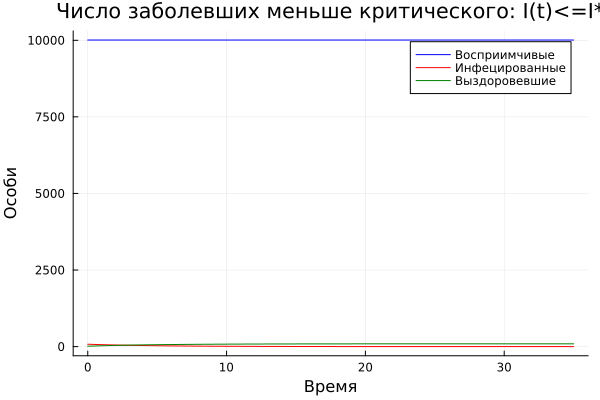

In [2]:
plt1 = plot(
  dpi=300,
  title="Число заболевших меньше критического: I(t)<=I*",
  legend=true)

plot!(
  plt1,
  sol1.t,
  S1,
  xlabel="Время",
  ylabel="Особи",
  label="Восприимчивые",
  color=:blue)

plot!(
  plt1,
  sol1.t,
  I1,
  label="Инфецированные",
  color=:red)

plot!(
  plt1,
  sol1.t,
  R1,
  label="Выздоровевшие",
  color=:green)

plt1

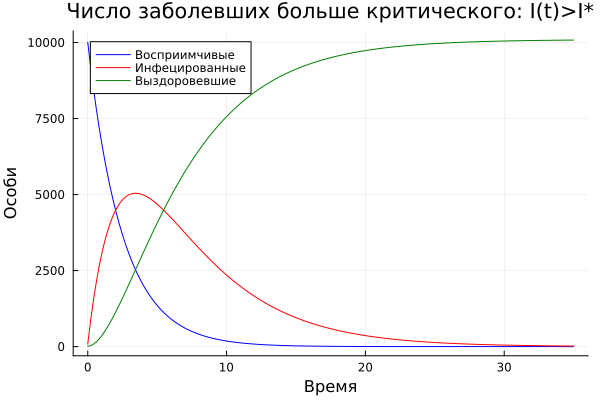

In [3]:
plt2 = plot(
  dpi=300,
  title="Число заболевших больше критического: I(t)>I*",
  legend=true)

plot!(
  plt2,
  sol2.t,
  S2,
  xlabel="Время",
  ylabel="Особи",
  label="Восприимчивые",
  color=:blue)

plot!(
  plt2,
  sol2.t,
  I2,
  label="Инфецированные",
  color=:red)

plot!(
  plt2,
  sol2.t,
  R2,
  label="Выздоровевшие",
  color=:green)

plt2